In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm

In [2]:
df1=pd.read_csv(r"E:\deepa\Omdena\Project1-Identifying Potential Areas for Urban Agriculture in Milan, Italy\Zone_9_data\Zone_9\NDVI_LST_UHI_UTFVI_30m\csv_files_median\zone9_ndvi_lst_uhi_utfvi_2023-01-01_2024-05-13.csv")

In [3]:
df1.head()

,Latitude,Longitude,Zone,NDVI,FV,EM,THERMAL,LST,UHI,UTFVI
0,45.5365,9.143143,zone9,0.438291,0.336703,0.987347,292.208202,21.666892,-0.828156,-0.100207
1,45.5365,9.143412,zone9,0.438291,0.336703,0.987347,292.208202,21.666892,-0.828156,-0.100207
2,45.5365,9.143682,zone9,0.346982,0.226704,0.986907,291.741642,21.283833,-0.974267,-0.120008
3,45.5365,9.143951,zone9,0.400994,0.289152,0.987157,290.676929,20.147635,-1.407648,-0.183170
4,45.5365,9.144221,zone9,0.400994,0.289152,0.987157,290.676929,20.147635,-1.407648,-0.183170


### Features
NDVI (Normalized Difference Vegetation Index)

FV (Fractional Vegetation)

EM (Emissivity)

THERMAL (Brightness Temperature)

LST (Land Surface Temperature)

UHI (Urban Heat Island Index)

UTFVI (Urban Thermal Field Variance Index)

In [4]:
# Get basic information about the dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60401 entries, 0 to 60400
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   60401 non-null  float64
 1   Longitude  60401 non-null  float64
 2   Zone       60401 non-null  object 
 3   NDVI       60401 non-null  float64
 4   FV         60401 non-null  float64
 5   EM         60401 non-null  float64
 6   THERMAL    60401 non-null  float64
 7   LST        60401 non-null  float64
 8   UHI        60401 non-null  float64
 9   UTFVI      60401 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.6+ MB
None


In [5]:
# Generate descriptive statistics
df1.describe()


,Latitude,Longitude,NDVI,FV,EM,THERMAL,LST,UHI,UTFVI
count,60401.000000,60401.000000,60401.000000,60401.000000,60401.000000,60401.000000,60401.000000,60401.000000,60401.000000
mean,45.508473,9.181950,0.356809,0.283772,0.987135,294.798792,24.351234,0.195737,0.009357
std,0.016259,0.022483,0.188628,0.234445,0.000938,2.471967,2.613388,0.996828,0.110072
min,45.480445,9.143143,-0.070541,0.000000,0.986000,285.748144,15.349773,-3.237704,-0.552992
25%,45.494459,9.162546,0.198739,0.094299,0.986377,292.886679,22.355558,-0.565477,-0.066315
50%,45.508473,9.181950,0.322763,0.201166,0.986805,294.881094,24.456848,0.236021,0.025301
75%,45.522486,9.201354,0.497055,0.418965,0.987676,296.685808,26.351516,0.958707,0.095381
max,45.536500,9.220757,0.806360,1.000000,0.990000,303.993535,33.935635,3.851529,0.297550


In [6]:
# Check for missing values
print(df1.isnull().sum())

# Check for duplicates
print(df1.duplicated().sum())

# Remove duplicates if any
df1 = df1.drop_duplicates()


Latitude     0
Longitude    0
Zone         0
NDVI         0
FV           0
EM           0
THERMAL      0
LST          0
UHI          0
UTFVI        0
dtype: int64
0


No null and duplicated values

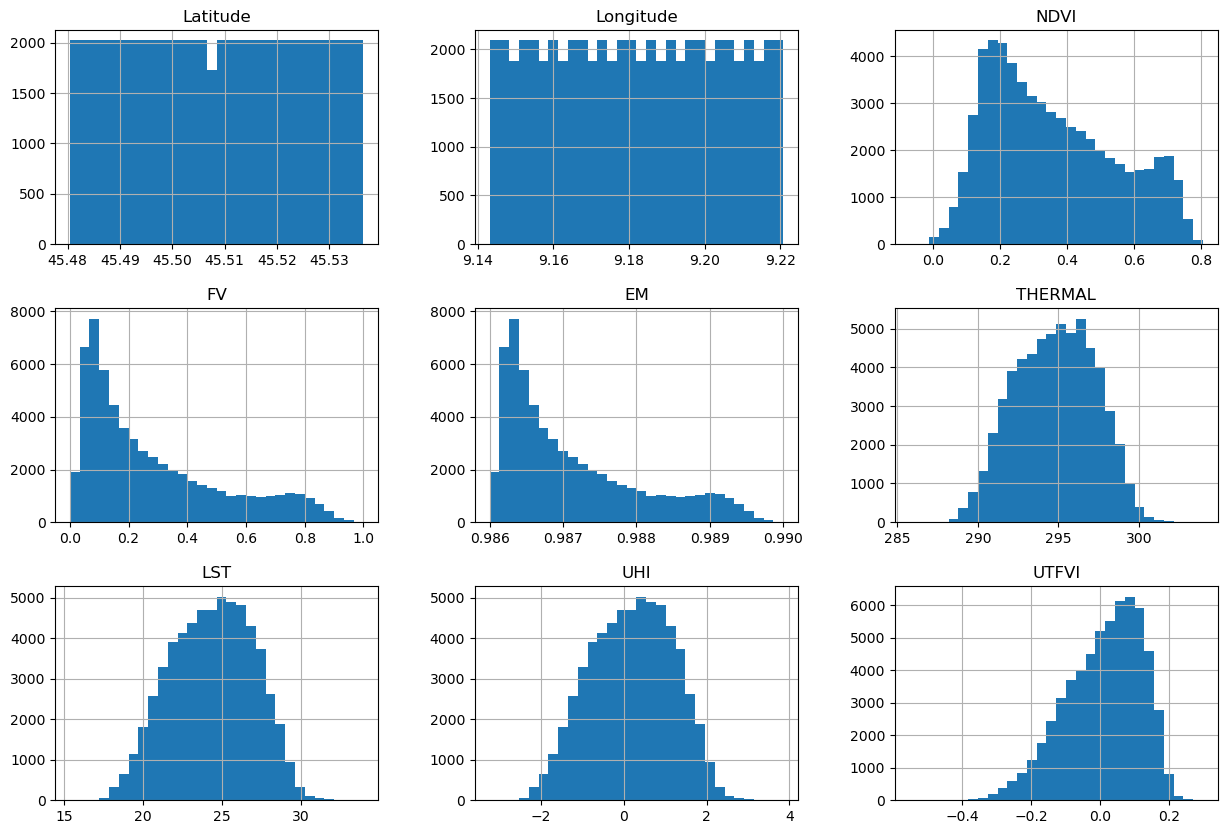

In [7]:

# Plot histograms for each numeric feature
df1.hist(bins=30, figsize=(15, 10))
plt.show()


Latitude and longitude follows uniform distribution

NDVI,FV and EM has moderate positive skewness

Thermal,LST,UHI follows normal distribution

UTFVI is having moderate negative skewness
 

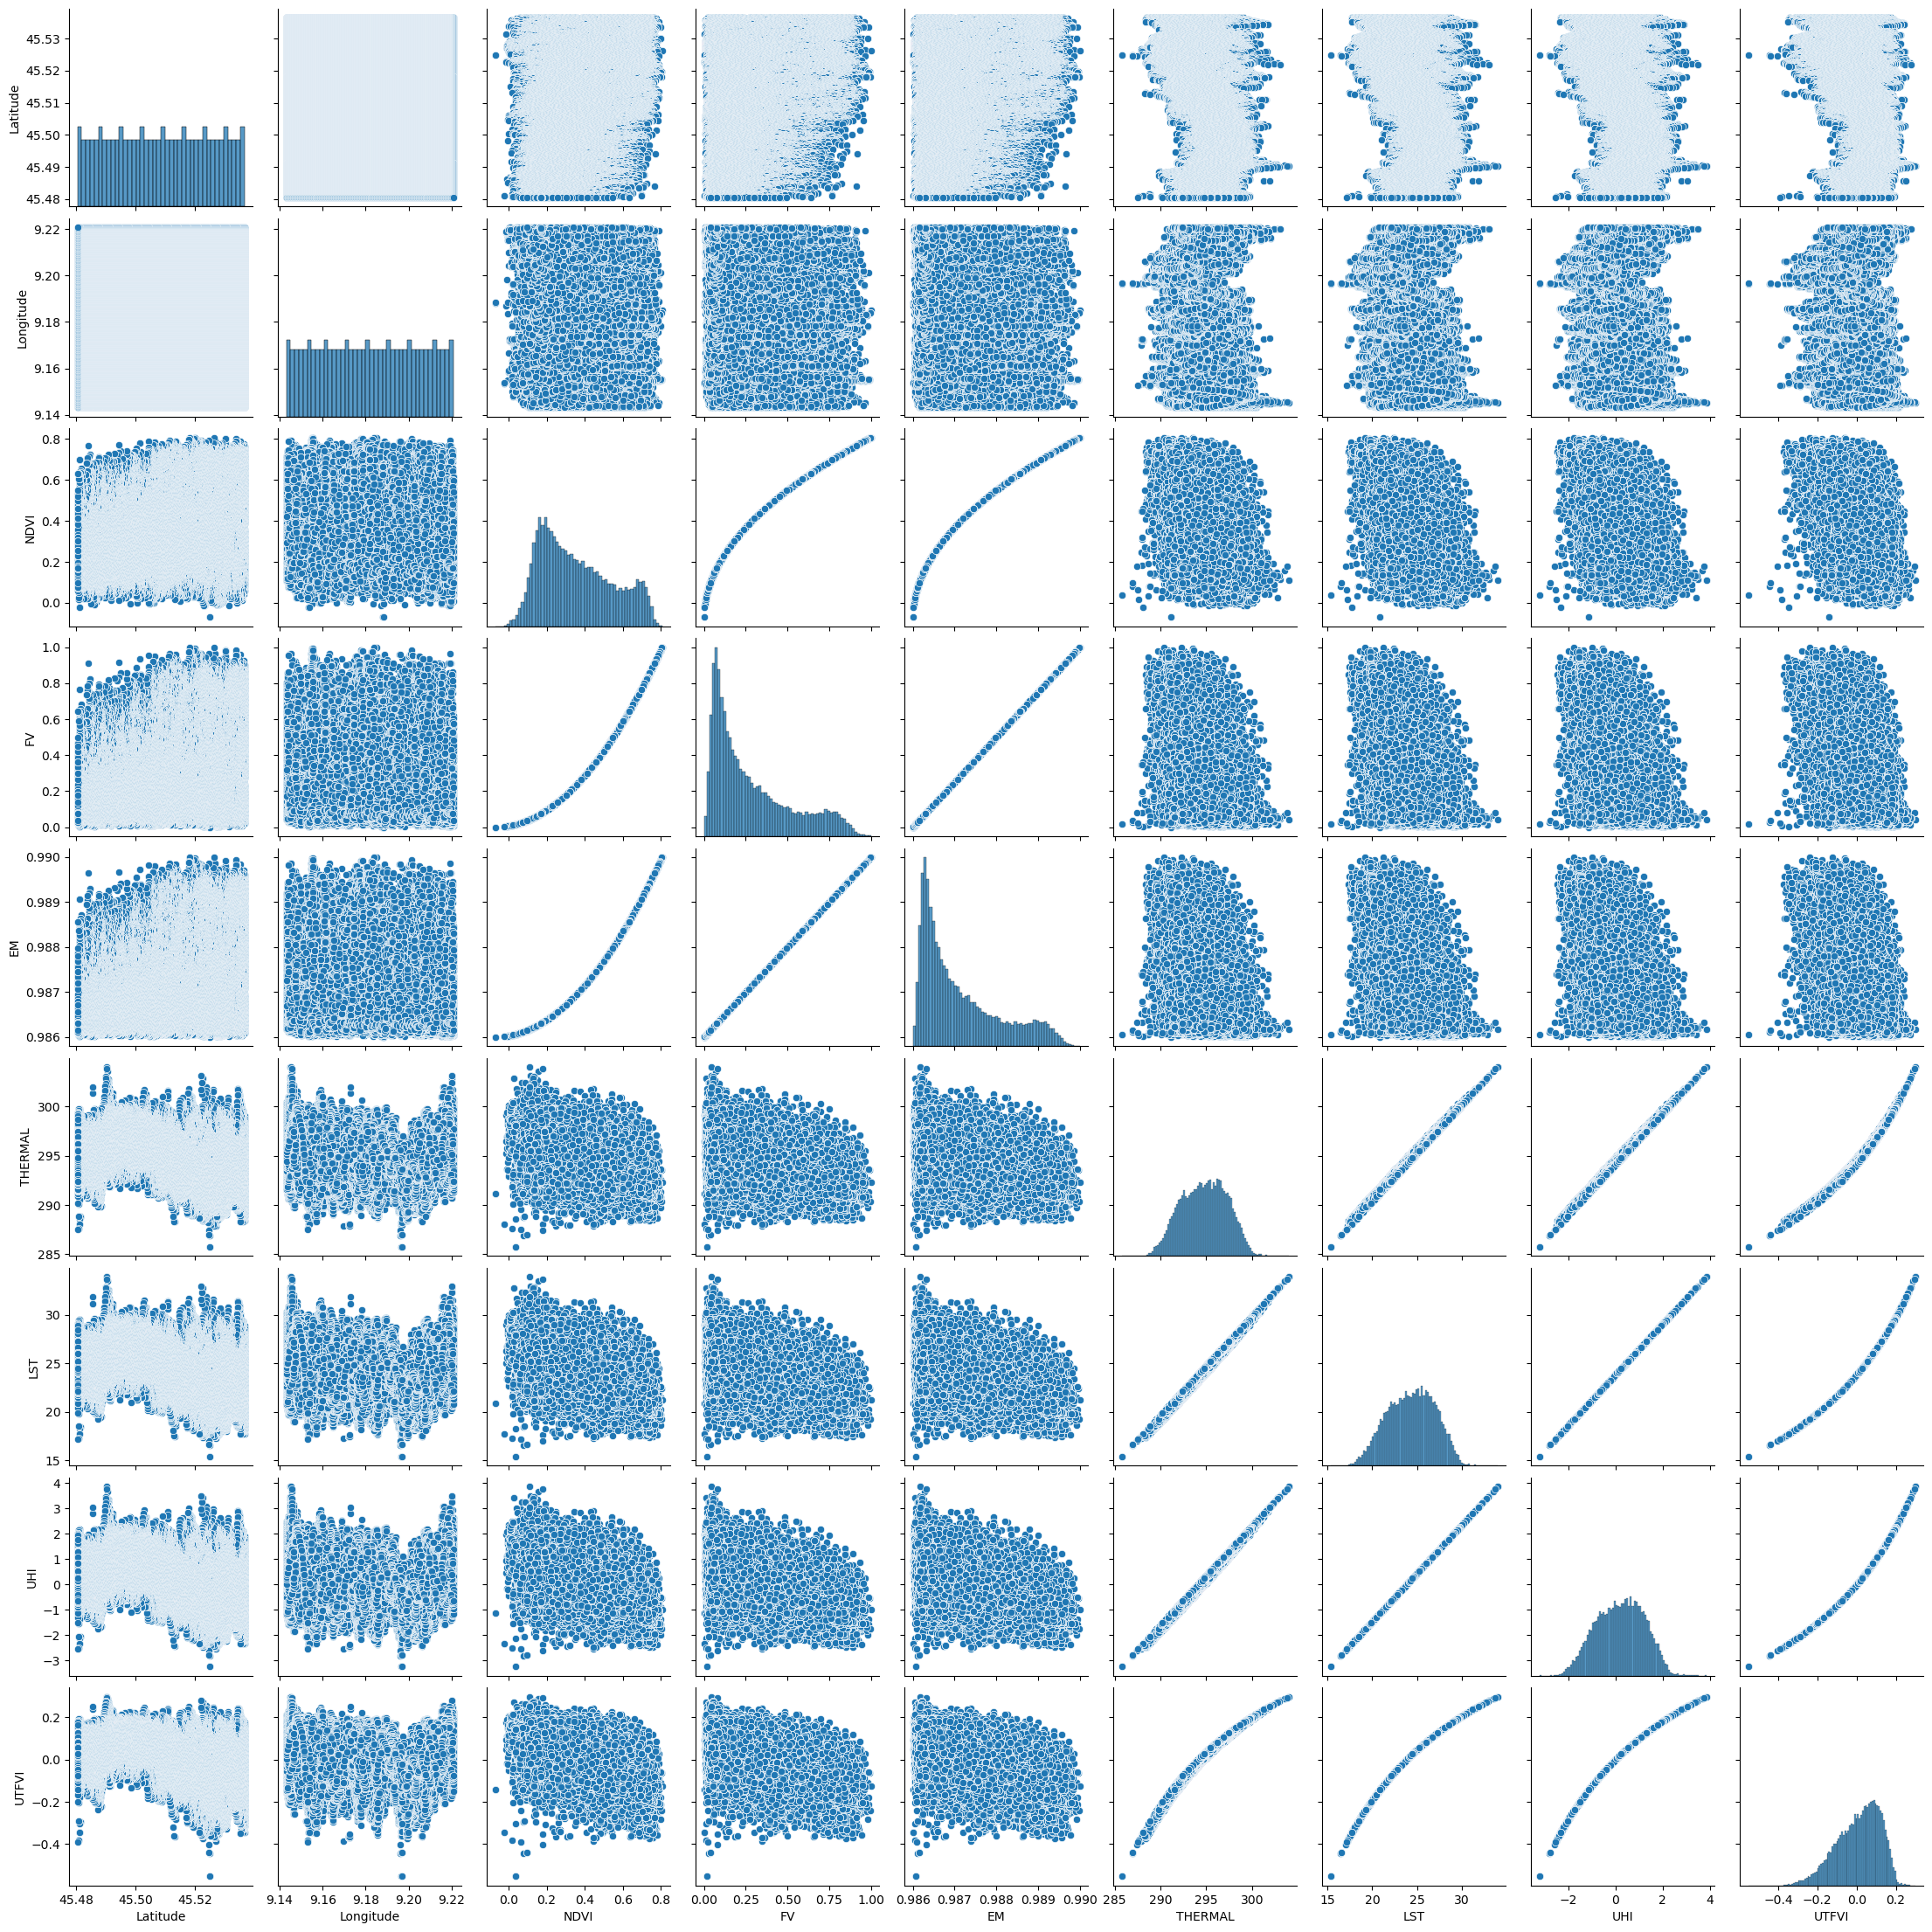

In [8]:
# Pairplot to see relationships between variables
sns.pairplot(df1)
plt.show()


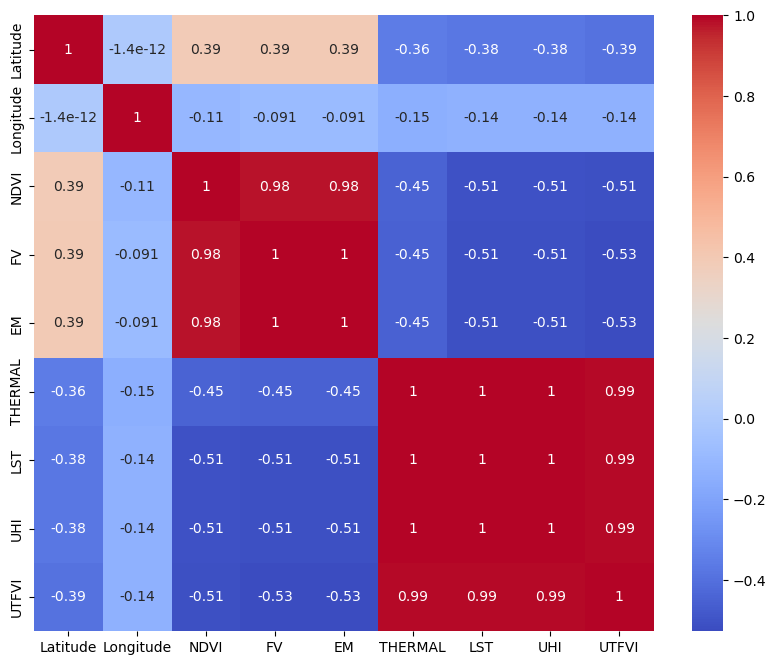

In [9]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()


In [10]:
# Display correlation matrix
corr_matrix = df1.corr()
corr_matrix


,Latitude,Longitude,NDVI,FV,EM,THERMAL,LST,UHI,UTFVI
Latitude,1.000000e+00,-1.384444e-12,0.387753,0.394585,0.394585,-0.359092,-0.375718,-0.375718,-0.391109
Longitude,-1.384444e-12,1.000000e+00,-0.106800,-0.090644,-0.090644,-0.148625,-0.136192,-0.136192,-0.138664
NDVI,3.877528e-01,-1.068003e-01,1.000000,0.981680,0.981680,-0.447688,-0.505832,-0.505832,-0.514681
FV,3.945848e-01,-9.064416e-02,0.981680,1.000000,1.000000,-0.452975,-0.512190,-0.512190,-0.526844
EM,3.945848e-01,-9.064416e-02,0.981680,1.000000,1.000000,-0.452975,-0.512190,-0.512190,-0.526844
THERMAL,-3.590916e-01,-1.486249e-01,-0.447688,-0.452975,-0.452975,1.000000,0.997713,0.997713,0.988215
LST,-3.757182e-01,-1.361919e-01,-0.505832,-0.512190,-0.512190,0.997713,1.000000,1.000000,0.991847
UHI,-3.757182e-01,-1.361919e-01,-0.505832,-0.512190,-0.512190,0.997713,1.000000,1.000000,0.991847
UTFVI,-3.911093e-01,-1.386641e-01,-0.514681,-0.526844,-0.526844,0.988215,0.991847,0.991847,1.000000


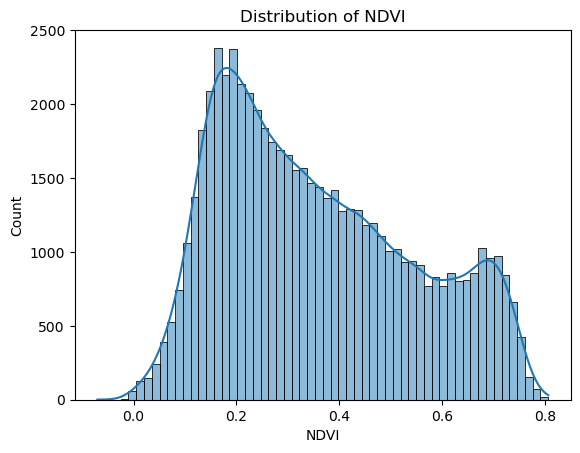

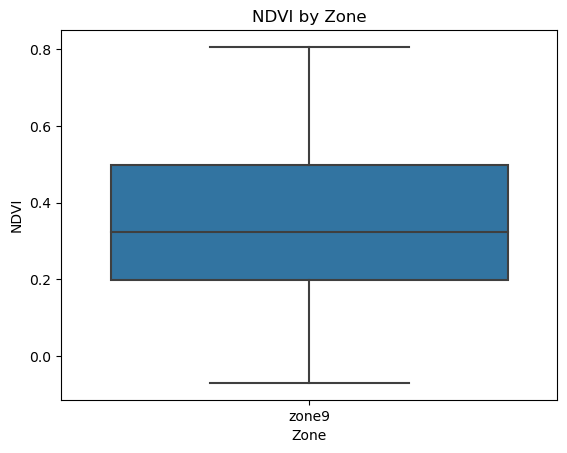

In [17]:
sns.histplot(df1['NDVI'], kde=True)
plt.title('Distribution of NDVI')
plt.show()

sns.boxplot(data=df1, x='Zone', y='NDVI')
plt.title('NDVI by Zone')
plt.show()


In [25]:
ndvi_skewness = skew(df1['NDVI'])
print(f'Skewness of NDVI: {ndvi_skewness:.3f}')


Skewness of NDVI: 0.443


### Skewness

- **Skewness**: The skewness of the data is 0.443. This indicates a slight positive skew, meaning the distribution has a longer right tail. There are more values that are higher than the mean compared to lower

In [26]:
ndvi_descriptive_stats = df1['NDVI'].describe()
print(ndvi_descriptive_stats)


count    60401.000000
mean         0.356809
std          0.188628
min         -0.070541
25%          0.198739
50%          0.322763
75%          0.497055
max          0.806360
Name: NDVI, dtype: float64



### Descriptive Statistics Analysis

1. **Count**: 60401
   - The dataset consists of 60,401 NDVI values

2. **Mean**: 0.356809
   - The average NDVI value is approximately 0.357. This indicates that, on average, the areas represented in this dataset have moderate vegetation.

3. **Standard Deviation (std)**: 0.188628
   - The standard deviation is approximately 0.189, indicating that there is some variability in the NDVI values around the mean. A lower standard deviation would imply that the values are closely clustered around the mean

4. **Minimum (min)**: -0.070541
   - The minimum NDVI value is slightly negative (-0.071), which could indicate areas with very little to no vegetation, or it could be a result of noise or errors in the data collection process.

5. **25th Percentile (25%)**: 0.198739
   - 25% of the NDVI values are below approximately 0.199. This is useful for understanding the distribution of values and identifying areas with sparse vegetation.

6. **Median (50%)**: 0.32276
   - The median NDVI value is approximately 0.323. This indicates that half of the NDVI values are below this value and half are above. The median being slightly lower than the mean suggests a slight positive skew in the data.

7. **75th Percentile (75%)**: 0.497055
   - 75% of the NDVI values are below approximately 0.497. This can help in understanding the upper quartile of vegetation density in the dataset.

8. **Maximum (max)**: 0.806360
   - The maximum NDVI value is approximately 0.806, indicating areas with very dense vegetation.





### Central Tendency and Dispersion

- **Central Tendency**: The mean and median provide insights into the typical NDVI value in the dataset. The close proximity of the mean (0.357) and median (0.323) suggests that the data is relatively symmetrically distributed around the center with a slight skew.
- **Dispersion**: The standard deviation, along with the interquartile range (IQR = Q3 - Q1 = 0.497055 - 0.198739 = 0.298316), shows the variability in NDVI values. Most of the data lies within a range of 0.298 around the central 50%.

### Distribution Shape

- **Range**: The range of NDVI values is from -0.070541 to 0.806360. This wide range indicates diverse vegetation density across the dataset.

